# Project

## Importowanie niezbędnych bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sns
import statistics

## Wczytywanie i interpretacja danych wejściowych oraz wyjściowych

In [2]:
patients = datasets.load_breast_cancer()

In [3]:
print(patients.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(patients['data'].shape)
print(patients['target'].shape)

(569, 30)
(569,)


#### Zbiór danych wejściowych liczy 569 wzorców (pacjentów), z czego każdy wzorzec liczy 30 cech. 
#### Zbiór danych wyjściowych liczy 569 wartości przyjmujących 0 lub 1 (jedna wartość do jednego wzorca). Wartość 0 reprezentuje zmianę nowotworową łagodną, natomiast wartość 1 zmianę nowotworową złośliwą.

## Wyświetlenie przykładowych danych przed i po standaryzacji

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(patients['data'])

In [6]:
for i in range(0,2):
    print(f"Patient {i+1}")
    print()
    print("Data before standarization:")
    print(patients['data'][i])
    print()
    print("Data after standarization:")
    print(scaled_data[i])
    print()
    print(f"Target: {patients['target'][i]}")
    print()
    print("----------------------------------------------------------------------")
    print()

Patient 1

Data before standarization:
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

Data after standarization:
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]

Target: 0

----------------------------------------------------------------------

Patient 2

Data before standarization:
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e

#### Dane reprezentujące zmianę nowotworową pacjenta pierwszego różnią się o nawet 6 rzędów wielkości. W związku z tym wykonaliśmy standaryzację. Jak można zauważyć, po standaryzacji wartości różnią się o 1 rząd wielkości.
#### Dane reprezentujące zmianę nowortorową pacjenta drugiego analogicznie do danych pierwszego różnią się o 6 rzędów wielkości. Po standaryzacji różnią się o 2 rzędy wielkości.
#### Taka standaryzacja pozwala nam na zmniejszenie wpływu cech o wartościach większych oraz tym samy na zwiększenie wpływu cech o wartościach mniejszych na proces trenowania modelu, a w związku z tym na prawidłowe rozpoznawanie klasy wynikowej.

In [7]:
patients_scaled_data = pd.DataFrame(scaled_data, columns=[patients.feature_names])
# patients_scaled_data.head()

In [8]:
pd.DataFrame(patients['data'], columns=[patients.feature_names]).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
patients_scaled_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


#### Warto zwrócić uwagę na parametr std, czyli odchylenie standardowe. Mówi on o tym, jak bardzo poszczególne wartości są rozrzucone wobec średniej. Warto zauważyć, że po standaryzacji danych, odchylenie standardowe wynosi prawie 1 dla wszystkich cech, natomiast średnia jest bliska 0. Przy idealnej standaryzacji odchylenie standardowe powinno wynosić dokładnie 1, natomiast średnia wynosić dokładnie 0. Możemy więc uznać, że standaryzacja przebiegła pomyślnie.

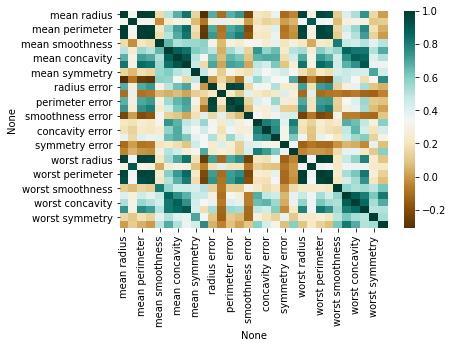

In [10]:

g = sns.heatmap(patients_scaled_data.corr(),cmap="BrBG",annot=False)


## Podział danych na zbiory uczące oraz testujące

In [11]:
train_data, test_data, \
train_target, test_target = \
train_test_split(patients_scaled_data, patients['target'], test_size=0.1, random_state=10)

In [12]:
print("Zbiór trenujący:")
print("Dane wejściowe:", train_data.shape)
print("Dane wyjściowe:", train_target.shape)

Zbiór trenujący:
Dane wejściowe: (512, 30)
Dane wyjściowe: (512,)


Dane wejściowe w zbiorze trenującym są macierzą o 512 wierszach i 30 kolumnach, natomiast dane wyjściowe są wektorem o 512 kolumnach. Oznacza to, że do zbioru trenującego zostało przydzielonych 512 pacjentów (czyli 90%, zgodnie z parametrem test_size wynoszącym 0,1)

In [13]:
print("Zbiór testujący:")
print("Dane wejściowe:", test_data.shape)
print("Dane wyjściowe:", test_target.shape)

Zbiór testujący:
Dane wejściowe: (57, 30)
Dane wyjściowe: (57,)


Dane wejściowe w zbiorze testującym są macierza o 57 wierszach i 30 kolumnach, natomiast dane wyjściowe są wektorem o 57 kolumnach. Oznacza to, że do zbioru trenującego zostało przydzielonych 57 pacjentów (czyli 10%, zgodnie z parametrem test_size wynoszącym 0,1)

## Trenowanie oraz testowanie modelu opartego o regresję logistyczną

In [14]:
from sklearn.linear_model import LogisticRegression

iterations_logistic_regresion = [1,2,3,4,5,10,20,50]
accuracy_logistic_regresion = []

for i in iterations_logistic_regresion:
    logistic_regression = LogisticRegression(max_iter=i)
    logistic_regression.fit(train_data, train_target)
    accuracy_logistic_regresion.append(accuracy_score(test_target, logistic_regression.predict(test_data)))

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

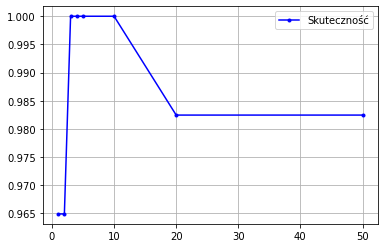

In [15]:
plt.plot(iterations_logistic_regresion, accuracy_logistic_regresion,'b', marker='.', label="Skuteczność")
plt.title("")
plt.legend()
plt.grid()
plt.savefig("Skuteczność_regresja_logistyczna")

### Ocena modelu dla 10 iteracji

In [16]:
logistic_regression_10iter = LogisticRegression(max_iter=10)
logistic_regression_10iter.fit(train_data, train_target)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=10)

In [17]:
acc = accuracy_score(test_target, logistic_regression_10iter.predict(test_data))
print("Dokładność modelu wynosi {0:0.2f}".format(acc))

Dokładność modelu wynosi 1.00


In [18]:
print("Błąd średniokwadratowy wynosi: %.2f" % 
      mean_squared_error(test_target, logistic_regression_10iter.predict(test_data)))

Błąd średniokwadratowy wynosi: 0.00


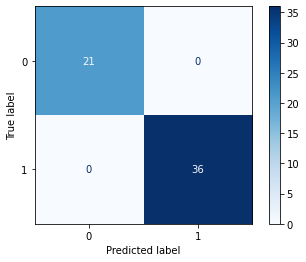

In [19]:
plot_confusion_matrix(logistic_regression_10iter, test_data, test_target, cmap=plt.cm.Blues)
plt.savefig("Macierz_konfuzji_regresja_logistyczna")

Powyższe parametry pozwalają na ocenę modelu. Dokładność modelu wyniosła 98%, a wynika to z faktu, że model błędnie rozpoznał tylko jeden obiekt. To, że model pomylił się w jednym przypadku widać natomiast w macierzy konfuzji. Na diagonali macierzy leżą liczby reprezentujące ilość prawidłowo rozpoznanych obiektów, natomiast pozostałe elementy repezentują ilość błędnie rozpoznanych obiektów. Błąd średniokwadratowy natomiast ciężko jest wprost interpretować, lecz ważne jest, aby zbliżał się maksymalnie do 0. 

### Ocena modelu z pomocą kroswalidacji

In [20]:
scores = cross_val_score(LogisticRegression(), scaled_data, patients['target'], cv=5)
print(scores)

[0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]


Wektor wynikowy kroswalidacji pozwala na ocenę modelu z wyeliminowaniem wpływu doboru zbioru trenującego i testującego na skuteczność. Jak możemy zauważyć, wszystkie wartości ocsylują między 97, a 99%, więc różne dobory zbiorów testującego i trenującego mogą doprowadzić do różnych wyników skuteczności modelu, lecz nie powinny być mniejsze niż 97%.

## Trenowanie oraz testowanie modelu opartego o drzewo decyzyjne

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
depth_decistion_tree = [*range(2,50,1)]
accuracy_decision_tree = []
for i in depth_decistion_tree:
    decision_tree = DecisionTreeClassifier(max_depth=i)
    decision_tree.fit(train_data, train_target)
    accuracy_decision_tree.append(accuracy_score(test_target, decision_tree.predict(test_data)))

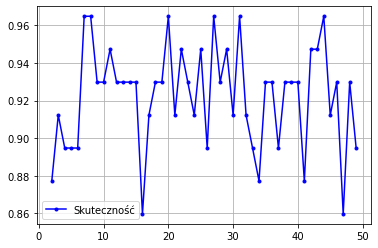

In [23]:
plt.plot(depth_decistion_tree, accuracy_decision_tree,'b', marker='.', label="Skuteczność")
plt.title("")
plt.legend()
plt.grid()
plt.savefig("Skuteczność_drzewo_decyzyjne")

### Ocena modelu dla 8 poziomów drzewa

In [24]:
decision_tree_depth8 = DecisionTreeClassifier(max_depth=8)
decision_tree_depth8.fit(train_data, train_target)

DecisionTreeClassifier(max_depth=8)

In [25]:
acc = accuracy_score(test_target, decision_tree_depth8.predict(test_data))
print("Dokładność modelu wynosi {0:0.2f}".format(acc))

Dokładność modelu wynosi 0.96


In [26]:
print("Błąd średniokwadratowy wynosi: %.2f" % 
      mean_squared_error(test_target, decision_tree_depth8.predict(test_data)))

Błąd średniokwadratowy wynosi: 0.04


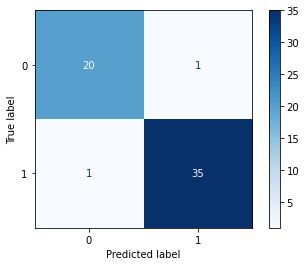

In [27]:
conf_matrix = plot_confusion_matrix(decision_tree_depth8, test_data, test_target, cmap=plt.cm.Blues)
plt.savefig("Macierz_konfuzji_drzewo_decyzyjne")

dwa zdania komentarza

### Ocena modelu z pomocą kroswalidacji

In [28]:
scores = cross_val_score(DecisionTreeClassifier(), 
                         scaled_data, patients['target'], cv=5)
print(scores)

[0.9122807  0.92982456 0.9122807  0.95614035 0.89380531]


trzy słowa komentarza

## Trenowanie oraz testowanie modelu opartego o RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_features=6)
forest.fit(train_data, train_target)

RandomForestClassifier(max_features=6, n_estimators=50)

In [30]:
acc = accuracy_score(test_target, forest.predict(test_data))
print("Dokładność modelu wynosi {0:0.2f}".format(acc))

Dokładność modelu wynosi 0.98


In [31]:
print("Błąd średniokwadratowy wynosi: %.2f" % 
      mean_squared_error(test_target, forest.predict(test_data)))

Błąd średniokwadratowy wynosi: 0.02


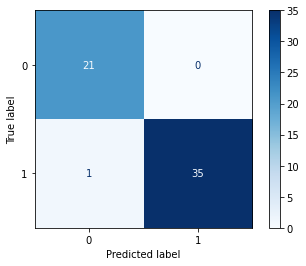

In [32]:
plot_confusion_matrix(forest, test_data, test_target, cmap=plt.cm.Blues)
plt.savefig("Macierz_konfuzji_random_forest")

In [33]:
scores = cross_val_score(RandomForestClassifier(), scaled_data, patients['target'], cv=5)
print(scores)

[0.92982456 0.95614035 0.98245614 0.97368421 0.97345133]
